In [1]:
# importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\HP\\Downloads')

In [3]:
data=pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# data type of each columns feature variable

data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# sample of data before deleting the unnecessary columns

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# deleting the unnecessary columns (RowNumber, CustomerId, Surname)

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
# sample of data after deleting the unnecessary columns

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# We can check if the pandas dataframe 'data' has any null values in each of its column using the isnull() function.
# Furthermore, the sum() function tells us the total null values in each column.

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

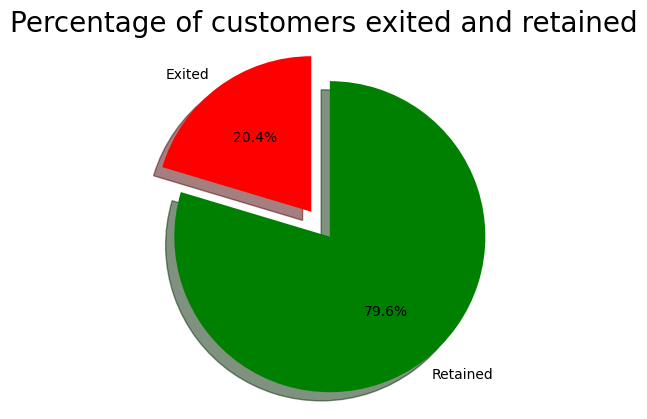

In [12]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = ['Exited', 'Retained']
sizes = [data.Exited[data['Exited'] == 1].count(), data.Exited[data['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()


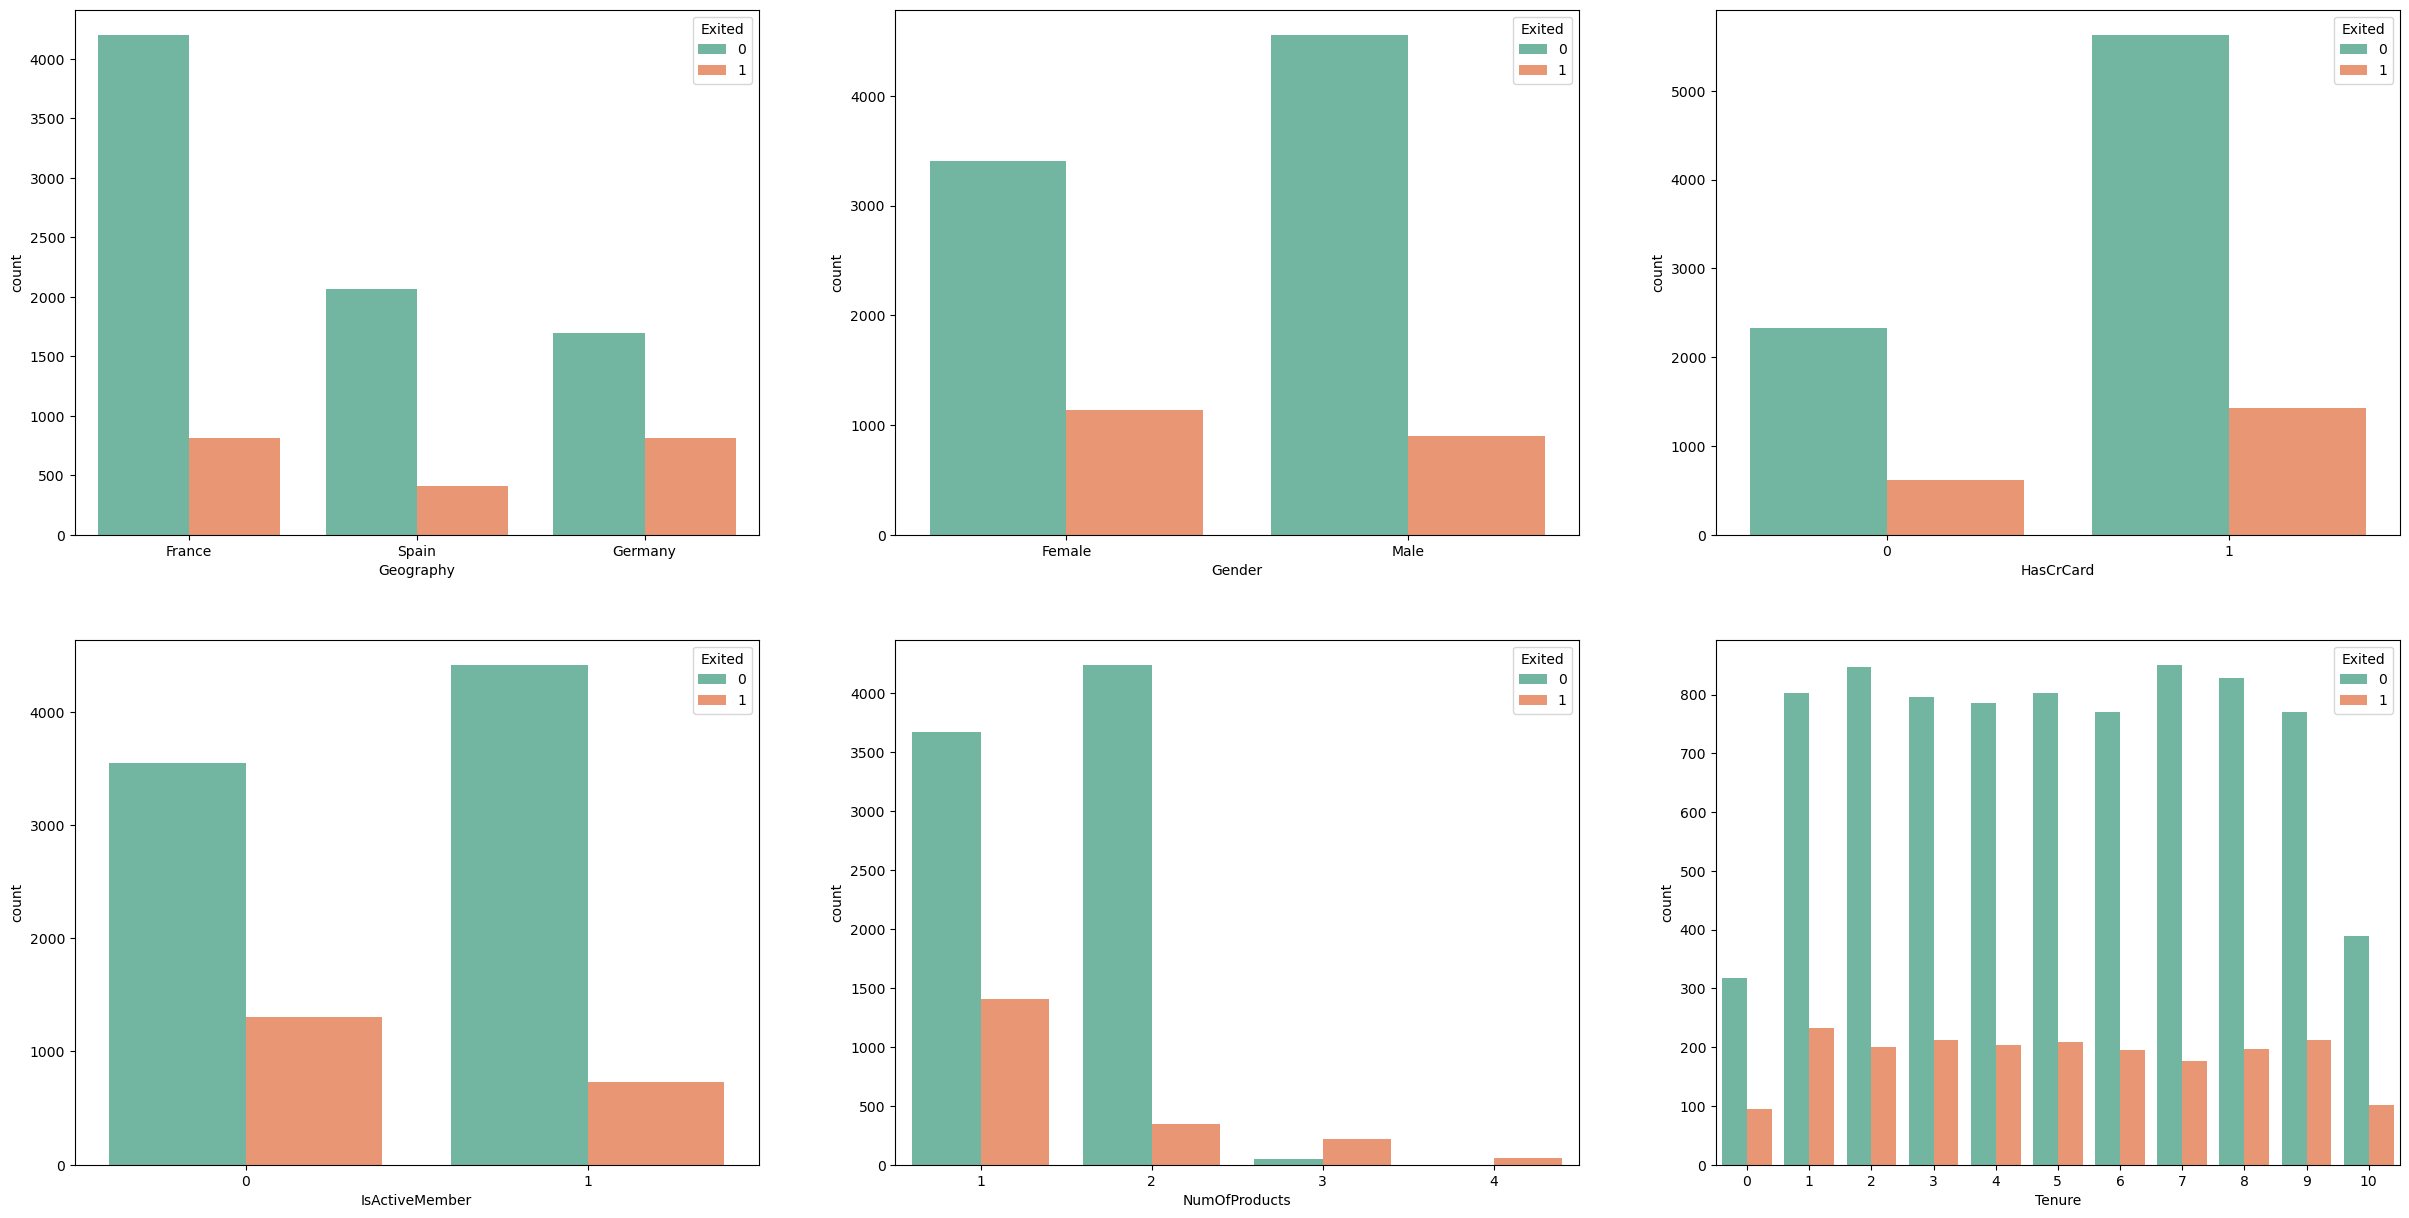

In [13]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=data, palette='Set2', ax=ax[1][2])

plt.show()

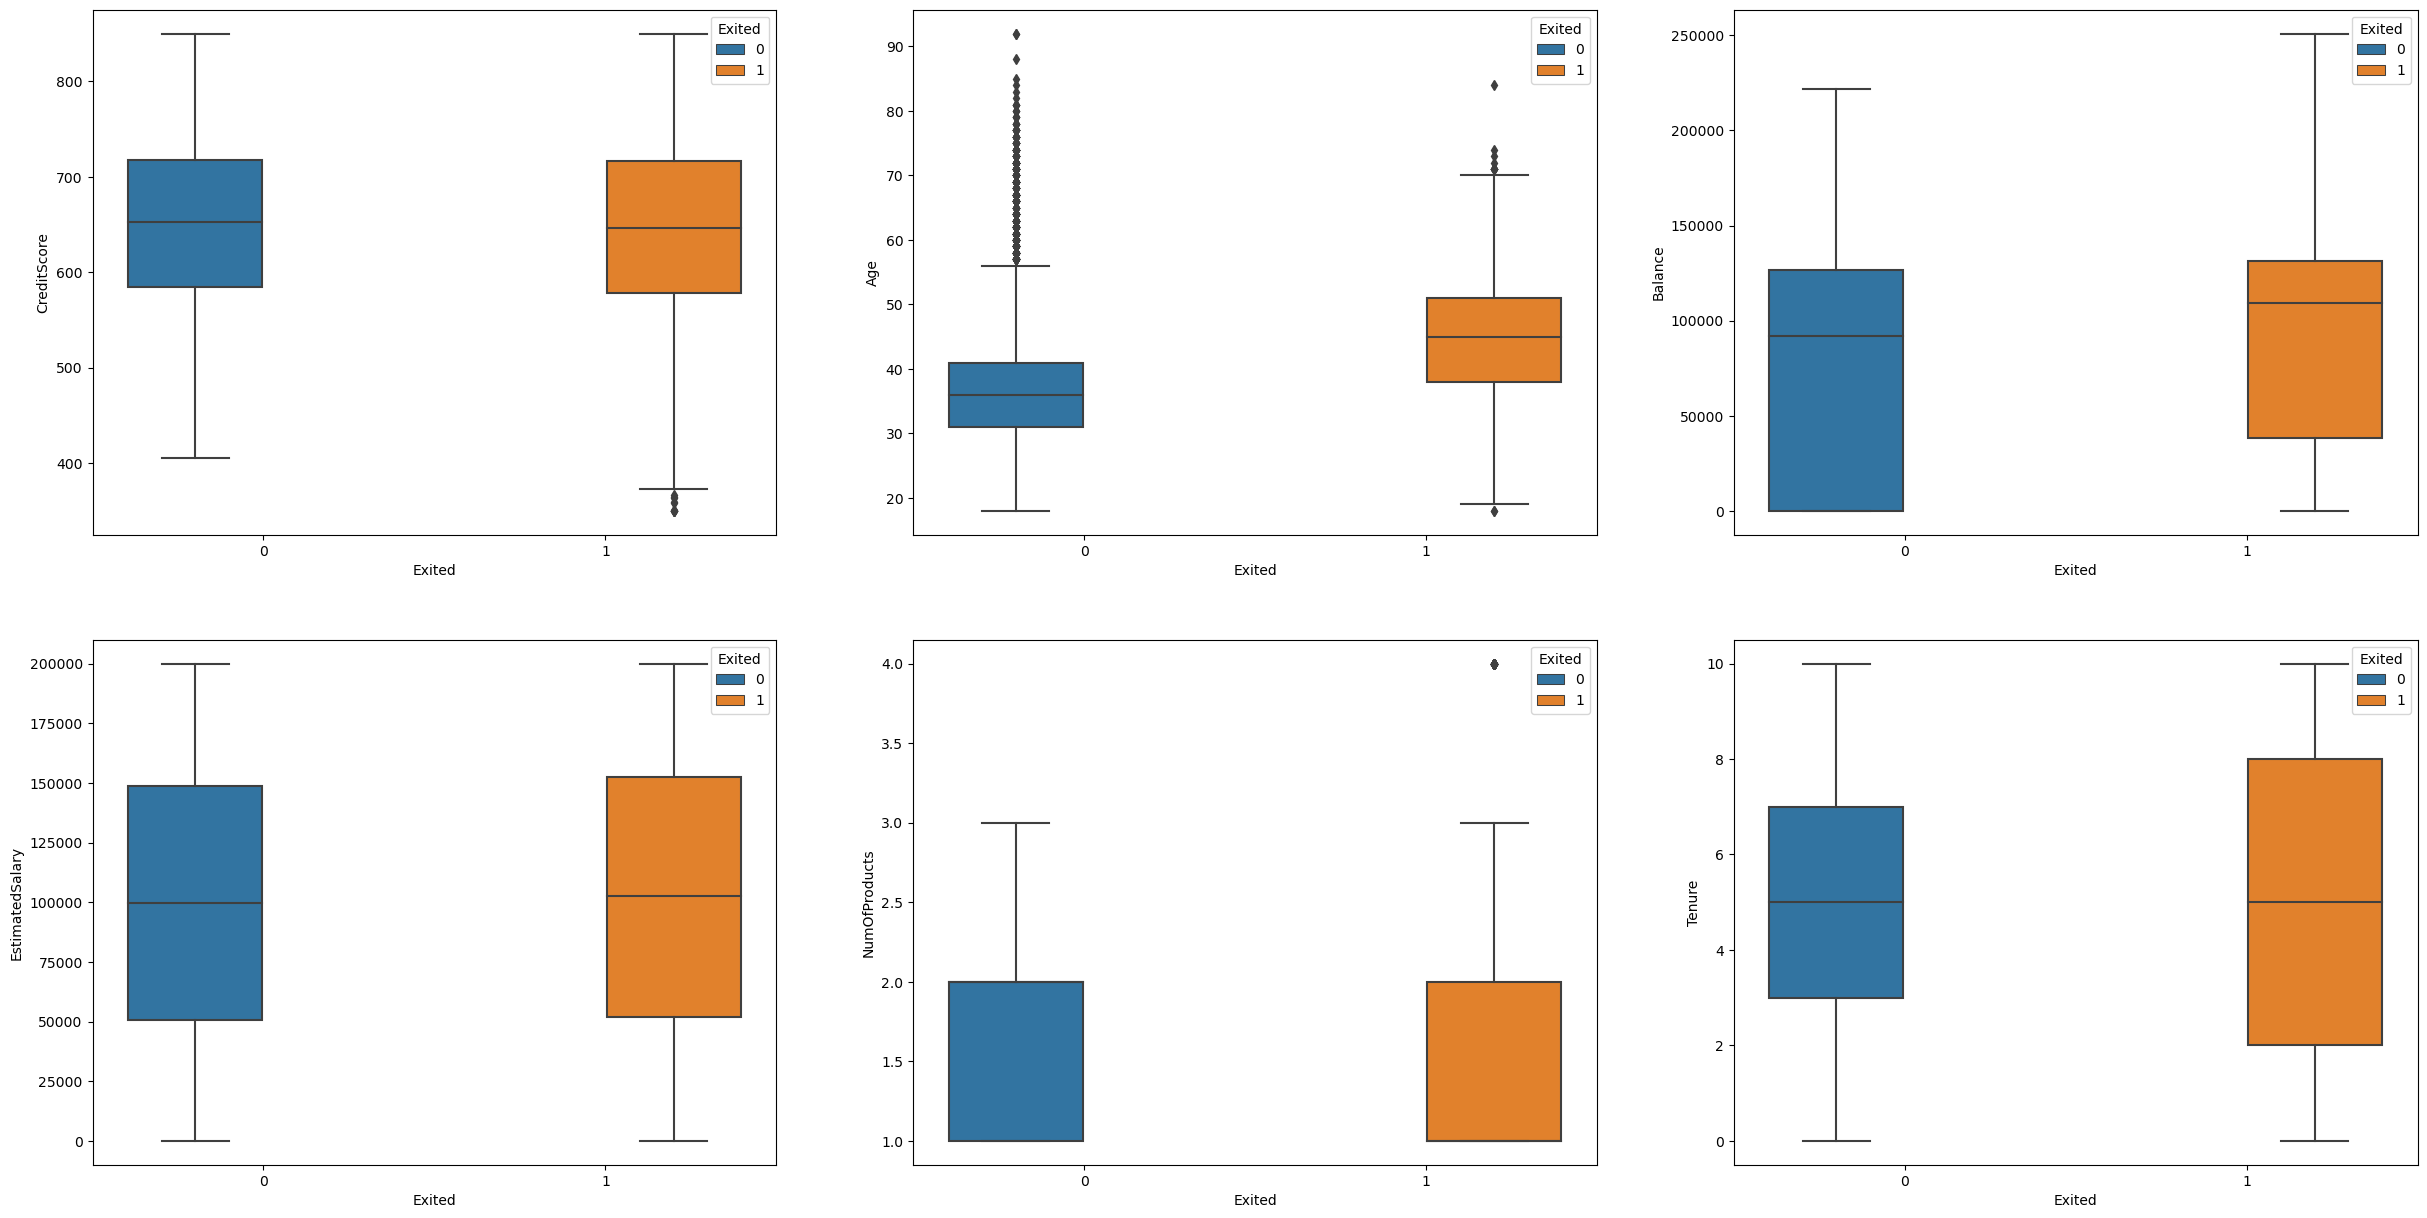

In [14]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=data, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=data, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=data, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=data, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=data, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=data, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

In [15]:
# list of continuous and categorical variables/features

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

# separating the train and test data using a 80%-20% split

data_train = data.sample(frac=0.8, random_state=100)
data_test = data.drop(data_train.index)

# check the number of rows in each data set for verification

print('Number of rows in train data: ', len(data_train))
print('Number of rows in test data: ', len(data_test))

print()

data_train = data_train[['Exited'] + continuous_vars + categorical_vars]
data_train.head()

Number of rows in train data:  8000
Number of rows in test data:  2000



,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,0,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,0,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,0,France,Male


In [16]:
# turning 0 values of numerical categorical features into -1
# to introduce negative relation in the calculations

data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,-1,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,-1,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,-1,France,Male


In [17]:
# list of categorical variables

var_list = ['Geography', 'Gender']

# turning the categorical variables into one-hot vectors

for var in var_list:
  for val in data_train[var].unique():
    data_train[var + '_' + val] = np.where(data_train[var] == val, 1, -1)

data_train = data_train.drop(var_list, axis=1)

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,632,23,3,122478.51,1,147230.77,1,-1,1,-1,-1,1,-1
9225,0,594,32,4,120074.97,2,162961.79,1,1,1,-1,-1,-1,1
3854,0,687,33,9,135962.40,2,121747.96,1,-1,1,-1,-1,1,-1
2029,0,520,33,4,156297.58,2,166102.61,1,1,-1,1,-1,1,-1
3539,0,667,42,6,0.00,1,88890.05,1,-1,-1,1,-1,1,-1


In [18]:
min_values = data_train[continuous_vars].min()
max_values = data_train[continuous_vars].max()

data_train[continuous_vars] = (data_train[continuous_vars] - min_values) / (max_values - min_values)
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,0.564,0.067568,0.3,0.488160,0.000000,0.736166,1,-1,1,-1,-1,1,-1
9225,0,0.488,0.189189,0.4,0.478581,0.333333,0.814829,1,1,1,-1,-1,-1,1
3854,0,0.674,0.202703,0.9,0.541903,0.333333,0.608740,1,-1,1,-1,-1,1,-1
2029,0,0.340,0.202703,0.4,0.622952,0.333333,0.830534,1,1,-1,1,-1,1,-1
3539,0,0.634,0.324324,0.6,0.000000,0.000000,0.444435,1,-1,-1,1,-1,1,-1


In [19]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [20]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

In [21]:
# SGD classifier
import time
start_time = time.time()

parameters = {'loss': ['hinge', 'log'],
              'max_iter': [50, 100, 200, 300], 
              'fit_intercept':[True],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

SGD_grid_model = GridSearchCV(SGDClassifier(), 
                              param_grid=parameters, 
                              cv=10, 
                              refit=True, 
                              verbose=0)

SGD_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SGD_grid_model)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic

[INFO] Time taken: 6.5 seconds.

0.80425
{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-06}
SGDClassifier(max_iter=50, tol=1e-06)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

In [22]:
# Logistic Regression classifier

start_time = time.time()

parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
              'max_iter': [50, 100, 200, 300], 
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

LR_grid_model = GridSearchCV(LogisticRegression(), 
                             param_grid=parameters, 
                             cv=10, 
                             refit=True, 
                             verbose=0)

LR_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(LR_grid_model)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[INFO] Time taken: 29.0 seconds.

0.813875
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=50, tol=1e-05)


In [23]:
# Support Vector Machines (RBF kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['rbf']}

SVM_rbf_grid_model = GridSearchCV(SVC(), 
                                  parameters, 
                                  cv=5, 
                                  refit=True, 
                                  verbose=0)

SVM_rbf_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_rbf_grid_model)

[INFO] Time taken: 571.0 seconds.

0.8466249999999998
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [24]:
# Support Vector Machines (Poly kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['poly'],
              'degree': [2, 3]}

SVM_poly_grid_model = GridSearchCV(SVC(), 
                                   parameters, 
                                   cv=5, 
                                   refit=True, 
                                   verbose=0)

SVM_poly_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_poly_grid_model)

[INFO] Time taken: 677.9 seconds.

0.852125
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [25]:
# Random Forest Classifier

start_time = time.time()

parameters = {'max_depth': [6, 7, 8, 9, 10], 
              'max_features': [5, 6, 7, 8, 9],
              'n_estimators':[10, 50, 100],
              'min_samples_split': [3, 5, 6, 7]}

RF_grid_model = GridSearchCV(RandomForestClassifier(),
                             parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

RF_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(RF_grid_model)

[INFO] Time taken: 3909.0 seconds.

0.865
{'max_depth': 10, 'max_features': 8, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=7)


In [26]:
# Extreme Gradient Boost (XGBoost) classifier

start_time = time.time()

parameters = {'max_depth': [5, 6, 7, 8],
              'gamma': [0.01, 0.001, 0.001],
              'min_child_weight': [1, 5, 10],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 20, 100]}

XGB_grid_model = GridSearchCV(XGBClassifier(), 
                              parameters, 
                              cv=10, 
                              refit=True, 
                              verbose=0)

XGB_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(XGB_grid_model)

[INFO] Time taken: 658.1 seconds.

0.8626249999999999
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [28]:
# SGD classifier

sgd_model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                          early_stopping=False, epsilon=0.1, eta0=0.0,
                          fit_intercept=True, l1_ratio=0.15,
                          learning_rate='optimal', loss='log_loss', max_iter=300,
                          n_iter_no_change=5, n_jobs=None, penalty='l2', 
                          power_t=0.5, random_state=None, shuffle=True,
                          tol=1e-06, validation_fraction=0.1, verbose=0,
                          warm_start=False)

sgd_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SGDClassifier(loss='log_loss', max_iter=300, tol=1e-06)

In [29]:
# Logistic Regression

lr_model = LogisticRegression(C=0.1, class_weight=None, dual=False, 
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=50, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='lbfgs', tol=1e-05, verbose=0,
                              warm_start=False)

lr_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

LogisticRegression(C=0.1, max_iter=50, tol=1e-05)

In [30]:
# SVM (RBF kernel)

svm_rbf_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, 
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
                    random_state=None, shrinking=True, tol=0.001,
                    verbose=False)

svm_rbf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [31]:
# SVM (Poly kernel)

svm_poly_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma=0.1, kernel='poly', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False)

svm_poly_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [33]:
# Random Forest classifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  class_weight=None, criterion='gini', 
                                  max_depth=9, max_features=9,
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0, 
                                  min_samples_leaf=1, 
                                  min_samples_split=7, 
                                  min_weight_fraction_leaf=0.0, n_estimators=50,
                                  n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0,
                                  warm_start=False)

rf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

RandomForestClassifier(max_depth=9, max_features=9, min_samples_split=7,
                       n_estimators=50)

In [34]:
# XGBoost classifier

xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0.001,
                          learning_rate=0.1, max_delta_step=0, max_depth=5,
                          min_child_weight=1, missing=None, n_estimators=100,
                          n_jobs=1, nthread=None, objective='binary:logistic',
                          random_state=0, reg_alpha=0, reg_lambda=1, 
                          scale_pos_weight=1, seed=None, silent=None,
                          subsample=1, verbosity=1)

xgb_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.001,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [35]:
print('[INFO] SGD classifier:\n')
print(classification_report(data_train.Exited, sgd_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SGD classifier:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6382
           1       0.59      0.23      0.33      1618

    accuracy                           0.81      8000
   macro avg       0.71      0.59      0.61      8000
weighted avg       0.78      0.81      0.78      8000



In [36]:
print('[INFO] Logistic Regression classifier:\n')
print(classification_report(data_train.Exited, lr_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Logistic Regression classifier:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6382
           1       0.69      0.15      0.25      1618

    accuracy                           0.81      8000
   macro avg       0.75      0.57      0.57      8000
weighted avg       0.79      0.81      0.76      8000



In [37]:
print('[INFO] SVM (RBF) classifier:\n')
print(classification_report(data_train.Exited, svm_rbf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (RBF) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6382
           1       0.84      0.38      0.53      1618

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [38]:
print('[INFO] SVM (Poly) classifier:\n')
print(classification_report(data_train.Exited, svm_poly_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (Poly) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6382
           1       0.81      0.36      0.50      1618

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000



In [39]:
print('[INFO] Random Forest classifier:\n')
print(classification_report(data_train.Exited, rf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Random Forest classifier:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6382
           1       0.88      0.57      0.69      1618

    accuracy                           0.90      8000
   macro avg       0.89      0.77      0.81      8000
weighted avg       0.89      0.90      0.89      8000



In [41]:
def get_roc(y, predict_vals, prob_values):
  roc_score = roc_auc_score(y, predict_vals)
  false_positives, true_positives, _ = roc_curve(y, prob_values)
  return (roc_score, false_positives, true_positives)

In [46]:
y = data_train.Exited
X = data_train.loc[:, data_train.columns != 'Exited']

roc_sgd, false_sgd, true_sgd = get_roc(y, sgd_model.predict(X), sgd_model.predict_proba(X)[:, 1])
roc_lr, false_lr, true_lr = get_roc(y, lr_model.predict(X), lr_model.predict_proba(X)[:, 1])
roc_svm_rbf, false_svm_rbf, true_svm_rbf = get_roc(y, svm_rbf_model.predict(X), svm_rbf_model.predict_proba(X)[:, 1])
roc_svm_poly, false_svm_poly, true_svm_poly = get_roc(y, svm_poly_model.predict(X), svm_poly_model.predict_proba(X)[:, 1])
roc_rf, false_rf, true_rf = get_roc(y, rf_model.predict(X), rf_model.predict_proba(X)[:, 1])

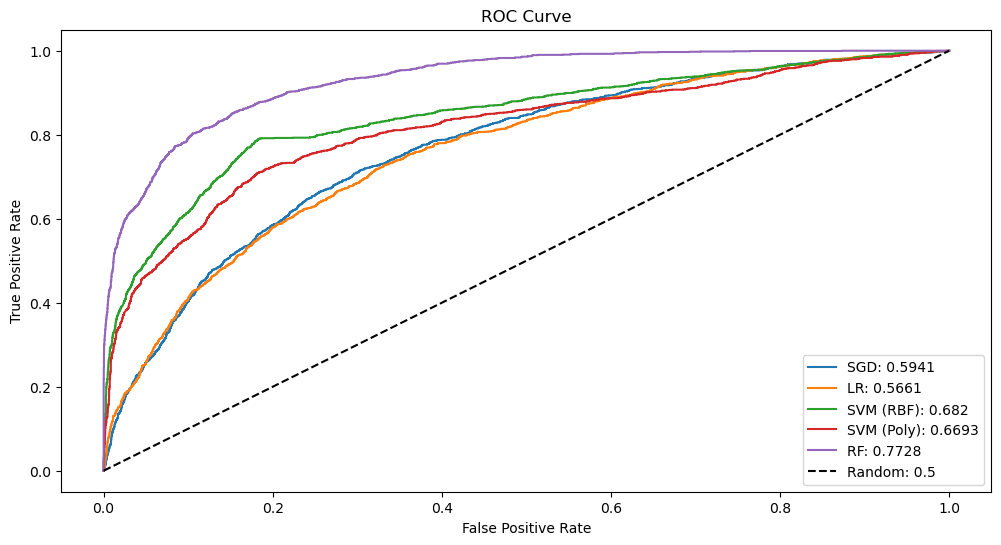

In [50]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_sgd, true_sgd, label = 'SGD: ' + str(round(roc_sgd, 4)))
plt.plot(false_lr, true_lr, label = 'LR: ' + str(round(roc_lr, 4)))
plt.plot(false_svm_rbf, true_svm_rbf, label = 'SVM (RBF): ' + str(round(roc_svm_rbf, 4)))
plt.plot(false_svm_poly, true_svm_poly, label = 'SVM (Poly): ' + str(round(roc_svm_poly, 4)))
plt.plot(false_rf, true_rf, label = 'RF: ' + str(round(roc_rf, 4)))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

In [ ]:
data_test = data_test[['Exited'] + continuous_vars + categorical_vars]

# Change the 0 in categorical variables to -1

data_test.loc[data_test.HasCrCard == 0, 'HasCrCard'] = -1
data_test.loc[data_test.IsActiveMember == 0, 'IsActiveMember'] = -1

var_list = ['Geography', 'Gender']

for var in var_list:
    for val in data_test[var].unique():
        data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)

# Drop the original categorical columns after one-hot encoding
data_test = data_test.drop(var_list, axis=1)

# Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
for column in data_train.columns:
    if column not in data_test.columns:
        data_test[column] = -1

# Reorder columns to match the order in the training dataset
data_test = data_test[data_train.columns]

# MinMax scaling of the continuous variables based on min and max from the train data
data_test[continuous_vars] = (data_test[continuous_vars] - min_values) / (max_values - min_values)

In [54]:

data_test = data_test.mask(np.isinf(data_test))
data_test = data_test.dropna()

print(data_test.shape)

(2000, 14)


In [56]:
print(classification_report(data_test.Exited,  rf_model.predict(data_test.loc[:, data_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1581
           1       0.79      0.49      0.60       419

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [57]:
roc_rf_test, false_rf_test, true_rf_test = get_roc(data_test.Exited, 
                                                   rf_model.predict(data_test.loc[:, data_test.columns != 'Exited']), 
                                                   rf_model.predict_proba(data_test.loc[:, data_test.columns != 'Exited'])[:,1])

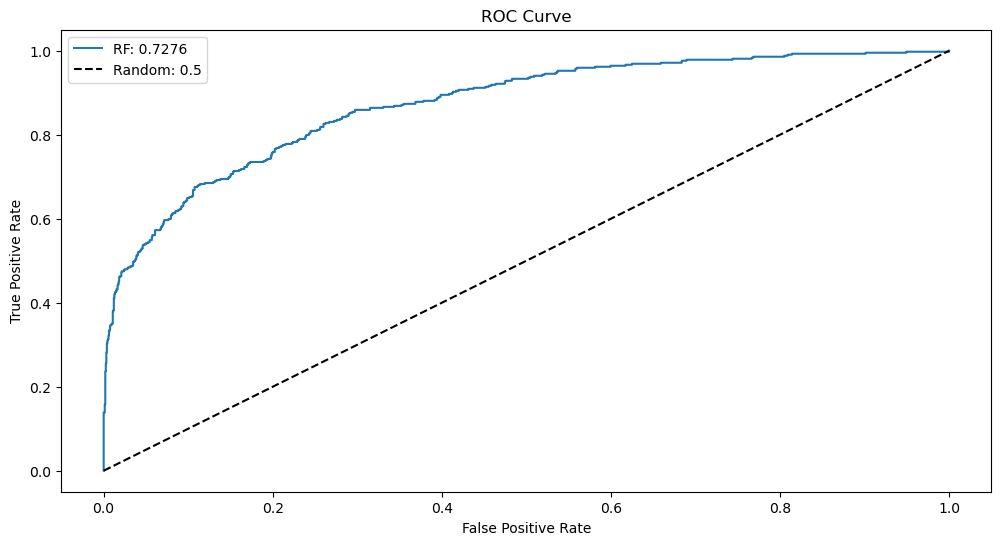

In [58]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_rf_test, 
         true_rf_test, 
         label = 'RF: ' + str(round(roc_rf_test, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()